<a href="https://colab.research.google.com/github/JS0501/ESAA_OB/blob/main/%EC%9C%A0%EC%A0%84%EC%B2%B4_%EC%A0%95%EB%B3%B4_%ED%92%88%EC%A2%85_%EB%B6%84%EB%A5%98_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://dacon.io/competitions/official/236035/codeshare/7430

### **1. 주제 및 데이터**
#### **배경**
유전체 염기서열에서 획득한 유전체 변이 정보인 Single Nucleotide Polymorphism 정보는 특정 개체 및 특정 품종에 따라 다른 변이 양상을 나타낼 수 있기 때문에 동일개체를 확인하거나, 동일 품종을 구분하는데 활용이 가능하다.

따라서 이번 대회에서는 개체 정보와 SNP 정보를 이용하여 A,B,C 품종을 분류하는 **최고의 품종 구분 정확도**를 획득하는 것이 목표이다.

농축수산 현장에서는 유전체 변이 정보를 이용해서 품종을 구분하는 연구를 통해 품종의 다양성 혹은 품종 부정 유통을 방지하기 위해 많이 활용된다.

#### **주제**
개체와 SNP 정보를 이용하여 품종 분류 AI 모델 개

#### **데이터**
- train.csv

id, 개체 정보(father,mother,gender,trait), 15개의 SNP 정보, class(개체의 품종 A,B,C)

- test.csv

id, 개체 정보(father,mother,gender,trait), 15개의 SNP 정보

- snp_info.csv

15개의 SNP 세부 정보 (name,chrom,cm,pos)

- sample_submission.csv

id, class(예측한 개체의 품종 A,B,C)

### **2. 코드 분석**
#### **전처리**
파생 변수로 SNP_info에 있는 chrom, cm 등을 clustering하여 특징별로 SNP 결합을 하는 등 약 80개의 파생 변수를 생성했다.

feature selection을 진행하여 최종 피처셋을 결정했다.

EDA 결과 클래스 불균형이 있는 걸로 판단하여 oversampling, undersampling 모델에서 class_weight, sample_weight를 조절하는 등 여러 실험을 한 결과 BorderlineSMOTE를 사용하는게 가장 좋았다.

(데이터셋이 작고 다중 분류인 대회이기에 앙상블을 진행하지 않으면 일반화 성능이 떨어질 것이라 예상하여 처음부터 최대한 많은 모델을 실험하는 쪽으로 방향을 잡았다.)

#### **모델 적합**

sklearn에 내장된 모든 classifier 및 boosting 계열 모델, 딥러닝 모델(TabNet)등을 사용했다.

sklearn에 내장된 모든 classifier 모델들은 all_algorithm을 통해 불러왔다.

boosting 계열 모델을 parameter tuning 하였을때 데이터셋이 작다 보니 튜닝 전 후 거의 차이가 없었다.

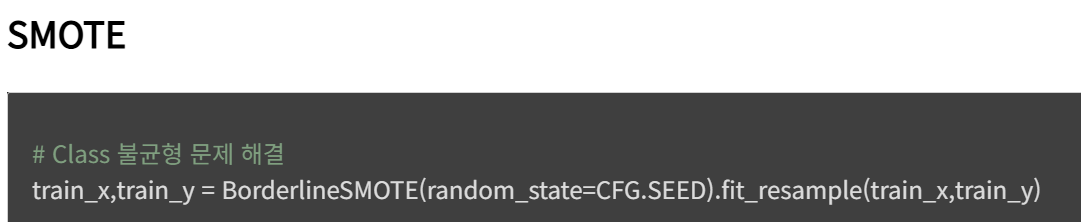

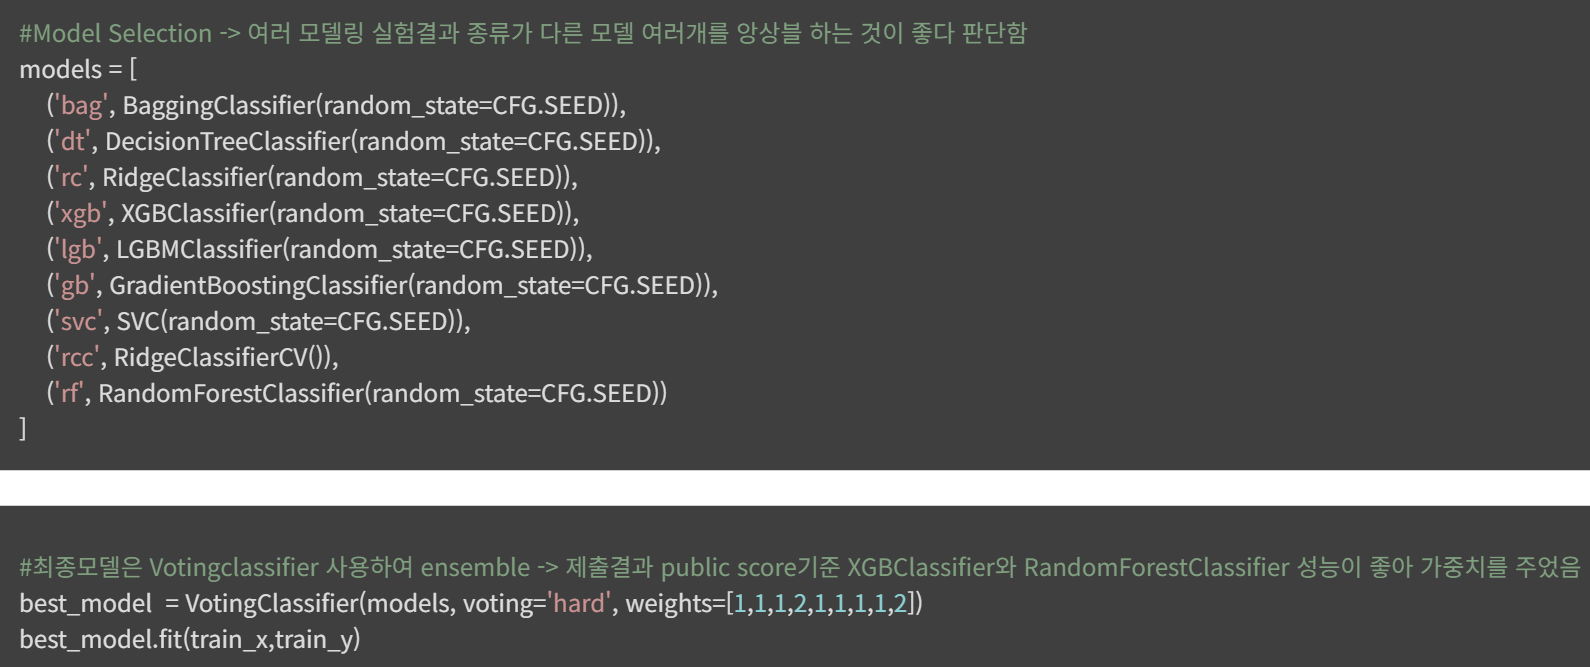

### **3. 차별점 및 배울점**
#### **차별점**

2~3개의 모델을 앙상블하는게 아니라 9개의 모델을 앙상블 했다.

소프트 보팅이 아닌 하드 보팅을 사용했다.

성능에 따라 가중치를 달리하였다.

일반 SMOTE가 아니라 BorderlineSMOTE를 사용했다.

#### **배울점**

- hard voting

1) 베이스 모델들이 확률 추정 성능이 낮을 때 유리

2) 투표자 모델 수가 맣고 독립적일 때 유리

3) 공격성 또는 노이즈 민감성 고려될 때 유리

4) 확률 정보를 무시하므로, 모델들이 어느 정도 확신하는지 반영하지 못함

5) 투표가 동률(tie)이나올 경우 처리 방식이 애매함

6) 불균형 클래스 문제가 있을 땐 soft voting이 유리할 수 있음

- BorderlineSMOTE

기존 SMOTE의 단점 보완을 위해 고안된 방식으로, 소수 클래스 샘플 중에서 경계 근처(borderline, 즉 다수 클래스와 가까운 쪽)에 있는 것들에 집중

1) 소수 클래스 전체를 무차별적으로 증강하는게 아니라 모델이 헷갈릴 가능성이 높은 경계만 증강하기에 자원 낭비가 덜할 수 있음

2) 경계 일반화 향상 가능성

3) 노이즈 증폭 완화

4) 경계 판단 기준이 잘못 정해지면 오히려 왜곡된 증강이 일어날 수 있음

5) 매우 심하게 불균형하고 소수 클래스 샘플 자체가 극히 적으면 경계 판단이 불안정할 수 있음
